In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
train=pd.read_csv(r'Desktop/train.csv').set_index('PassengerId')
test=pd.read_csv(r'desktop/titanic_test.csv').set_index('PassengerId')

In [141]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

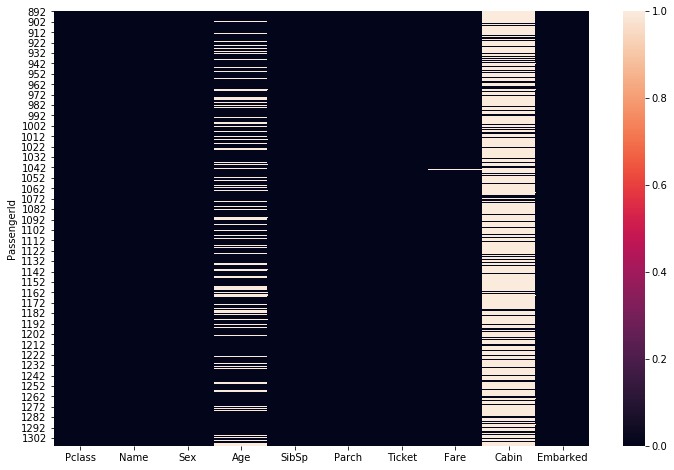

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(test.isnull())   

In [147]:
test['Cabin'].isnull().sum()

327

In [68]:
def impute(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [69]:
test['Age']=test[['Age','Pclass']].apply(impute,axis=1)

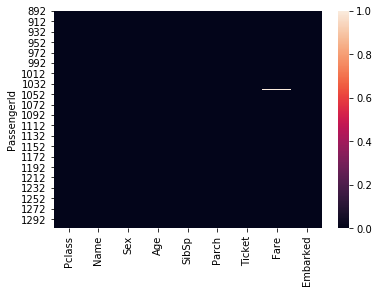

In [70]:
sns.heatmap(test.isnull())   

In [71]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [72]:
def fare(cols):
    Fare=cols[0]
    Pclass=cols[1]
    if pd.isnull(Fare):
        if Pclass==1:
            return 35
        elif Pclass==2:
            return 35
        if Pclass==3:
            return 35
    else:
        return Fare
    

In [73]:
test['Fare']=test[['Fare','Pclass']].apply(fare,axis=1)

In [74]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [75]:
se=pd.get_dummies(test["Sex"],drop_first=1)

In [76]:
pc=pd.get_dummies(test['Pclass'],drop_first=True)

In [77]:
em=pd.get_dummies(test['Embarked'],drop_first=True)

In [78]:
test=pd.concat([test,se,pc,em],axis=1)

In [79]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [80]:
test.drop(['Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [81]:
test.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
PassengerId,,,,,,,,,
892,34.5,0,0,7.8292,1,0,1,1,0
893,47.0,1,0,7.0000,0,0,1,0,1
894,62.0,0,0,9.6875,1,1,0,1,0
895,27.0,0,0,8.6625,1,0,1,0,1
896,22.0,1,1,12.2875,0,0,1,0,1


In [82]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [84]:
train.drop('Cabin',axis=1,inplace=True)

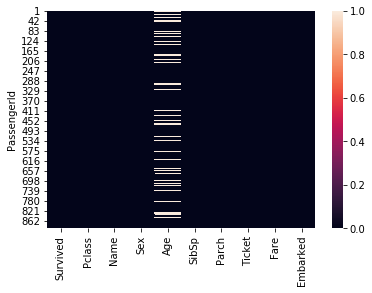

In [85]:
sns.heatmap(train.isnull())

In [87]:
train['Age']=train[['Age','Pclass']].apply(impute,axis=1)

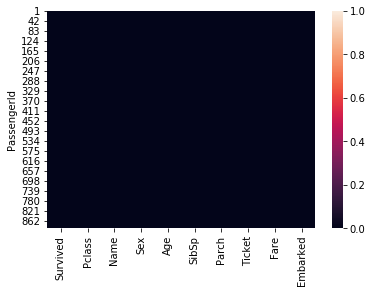

In [88]:
sns.heatmap(train.isnull())

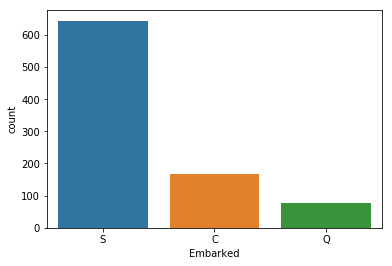

In [91]:
sns.countplot(x='Embarked',data=train)

In [104]:
def far(cols):
    Embarked=cols[0]
    Pclass=cols[1]
    if pd.isnull(Embarked):
        if Pclass==1:
            return 'S'
        elif Pclass==2:
            return 'S'
        if Pclass==3:
            return 'S' 
    else:
        return Embarked
    

In [105]:
train['Embarked']=train[['Embarked','Pclass']].apply(far,axis=1)

In [106]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [111]:
s=pd.get_dummies(train['Sex'],drop_first=1)
e=pd.get_dummies(train['Embarked'],drop_first=1)
p=pd.get_dummies(train['Pclass'],drop_first=1)
p

,2,3
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,0
5,0,1
6,0,1
7,0,0
8,0,1
9,0,1


In [112]:
tarin=pd.concat([train,s,e,p],axis=1)

In [113]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [115]:
train.drop(['Pclass','Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [116]:
train.head()

,Survived,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,0,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,1,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,0,35.0,0,0,8.0500


In [117]:
train=pd.concat([train,s,p,e],axis=1)

In [118]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,1,0,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1
5,0,35.0,0,0,8.0500,1,0,1,0,1


In [119]:
x=train.drop('Survived',axis=1)

In [120]:
y=train['Survived']

In [121]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.3, random_state=10001)

In [134]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200)

In [135]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [136]:
pred=model.predict(test)

In [137]:
len(pred)

418

In [138]:
pd.DataFrame({'Survived': pred}, index=test.index).reset_index().to_csv('submission3.csv', index=False)